In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('/mnt/c/Ryan_Data/Python_Tool/ryan_mplstyle.mplstyle')

import numpy as np

import h5py
import cmocean.cm as cmo
import dedalus.public as d3

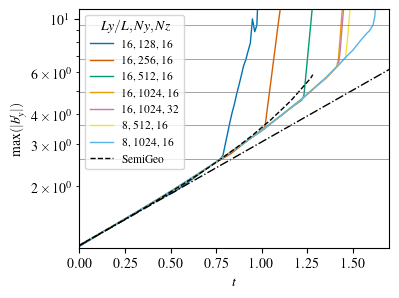

In [21]:
fig=plt.figure(1,figsize=(4, 3.1))

##################
Ro = 0.3;

##################
Ly = 16
Nz = 16
Ny_ary = [128,256,512,1024]
for Ny in Ny_ary:

    spname = 'QGpq1_Ro%.2f_Ly%d_Ny%d_Nz%d_snap' %(Ro, Ly, Ny, Nz)
    spname = spname.replace(".", "d" ); 
    snapname = "../"+spname+"/"+spname+"_s1.h5"

    with h5py.File(snapname, mode='r') as file:
        absdybt = np.squeeze(np.array(file['tasks']['absdybt']))
        sim_time_ary = np.array(file['scales']['sim_time'])

    fig=plt.figure(1)
    plt.semilogy(sim_time_ary,np.max(absdybt,1),label='%d, %d, %d' %(Ly, Ny,Nz));
    
##################
Ly = 16
Nz = 32
Ny_ary = [1024]
# Ny_ary = [128, 256]
for Ny in Ny_ary:

    spname = 'QGpq1_Ro%.2f_Ly%d_Ny%d_Nz%d_snap' %(Ro, Ly, Ny, Nz)
    spname = spname.replace(".", "d" ); 
    snapname = "../"+spname+"/"+spname+"_s1.h5"

    with h5py.File(snapname, mode='r') as file:
        absdybt = np.squeeze(np.array(file['tasks']['absdybt']))
        sim_time_ary = np.array(file['scales']['sim_time'])

    fig=plt.figure(1)
    plt.semilogy(sim_time_ary,np.max(absdybt,1),label='%d, %d, %d' %(Ly, Ny,Nz));
    
##################
Ly = 8
Nz = 16
Ny_ary = [512, 1024]
# Ny_ary = [128, 256]
for Ny in Ny_ary:

    spname = 'QGpq1_Ro%.2f_Ly%d_Ny%d_Nz%d_snap' %(Ro, Ly, Ny, Nz)
    spname = spname.replace(".", "d" ); 
    snapname = "../"+spname+"/"+spname+"_s1.h5"

    with h5py.File(snapname, mode='r') as file:
        absdybt = np.squeeze(np.array(file['tasks']['absdybt']))
        sim_time_ary = np.array(file['scales']['sim_time'])

    fig=plt.figure(1)
    plt.semilogy(sim_time_ary,np.max(absdybt,1),label='%d, %d, %d' %(Ly, Ny,Nz));
    
    
##################
Ly = 16
Ny, Nz = 1024, 16

spname = 'SemiG_Ro%.2f_Ly%d_Ny%d_Nz%d_snap' %(Ro, Ly, Ny, Nz)
spname = spname.replace(".", "d" ); 
snapname = "../"+spname+"/"+spname+"_s1.h5"

with h5py.File(snapname, mode='r') as file:
    absdybt = np.squeeze(np.array(file['tasks']['absdybt']))
    sim_time_ary = np.array(file['scales']['sim_time'])

fig=plt.figure(1)
plt.semilogy(sim_time_ary,np.max(absdybt,1),'k--',label='SemiGeo');
    
##################
fig=plt.figure(1)
plt.semilogy([0,1.7],1.126*np.exp([0,1.7]),'k-.');

plt.legend()
plt.xlim([0,1.7])
plt.ylim([1.1,11])

############################
for i in range(5):
    plt.axhline(2.6*1.38**i,color='0.5',linewidth=0.5)

plt.legend(title="$Ly/L,Ny,Nz$",loc='upper left',fontsize='small')
plt.xlabel("$t$")
plt.ylabel("$\max(|b^t_y|)$")
# plt.title("Evolution of maximum top bouyancy gradient")

plt.savefig('figs/2DFQGpl_growth.pdf', bbox_inches='tight')
plt.show()